In [1]:
import os
os.getcwd()
os.chdir(r'/home/manhducnmd/Delphes-3.5.0')

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.font_manager import FontProperties
import pickle

In [3]:
import ROOT
ROOT.gSystem.Load("libDelphes")

Welcome to JupyROOT 6.20/08


0

In [4]:
try:
    ROOT.gInterpreter.Declare('#include "classes/DelphesClasses.h"')
    ROOT.gInterpreter.Declare('#include "external/ExRootAnalysis/ExRootTreeReader.h"')
except:
    pass

Extract signal data files

In [5]:
inputFile='/home/manhducnmd/pythia8312/events/id30.root'
chain = ROOT.TChain("Delphes")
chain.Add(inputFile)

# Create object of class ExRootTreeReader
treeReader = ROOT.ExRootTreeReader(chain)
numberOfEntries = treeReader.GetEntries()

# Get pointers to branches used in this analysis
branchJet = treeReader.UseBranch("Jet")
branchEFlowTrack = treeReader.UseBranch("EFlowTrack")
branchEFlowPhoton = treeReader.UseBranch("EFlowPhoton")
branchEFlowNeutralHadron = treeReader.UseBranch("EFlowNeutralHadron")

Warning in <TStreamerInfo::BuildCheck>: 
   The StreamerInfo of class GenParticle read from file /home/manhducnmd/pythia8312/events/id30.root
   has the same version (=2) as the active class but a different checksum.
   You should update the version to ClassDef(GenParticle,3).
   Do not try to write objects with the current class definition,
   the files will not be readable.

Warning in <TStreamerInfo::CompareContent>: The following data member of
the in-memory layout version 2 of class 'GenParticle' is missing from 
the on-file layout version 2:
   float CtgTheta; //
Warning in <TStreamerInfo::CompareContent>: The following data member of
the in-memory layout version 2 of class 'GenParticle' is missing from 
the on-file layout version 2:
   float D0; //
Warning in <TStreamerInfo::CompareContent>: The following data member of
the in-memory layout version 2 of class 'GenParticle' is missing from 
the on-file layout version 2:
   float DZ; //
Warning in <TStreamerInfo::CompareContent>: 

In [7]:
Pt_signal = []

P4_1_signal = []
P4_2_signal = []

Mjj_signal = []

eta_1_signal = []
eta_2_signal = []

phi_1_signal = []
phi_2_signal = []

final_signal_eta = []
final_signal_phi = []
final_signal_Pt = []
for i in range(0, numberOfEntries): 
    treeReader.ReadEntry(i)
    
    if branchJet.GetEntries() > 2:
        jet1 = branchJet.At(0)      # The first leading jet
        jet2 = branchJet.At(1)   # The second leading jet
        jetvec1= jet1.P4() 
        jetvec2= jet2.P4() 
        jet = jetvec1 + jetvec2
        if jetvec1.Pt() > 700 and jetvec2.Pt() > 700:
            if np.abs(jetvec1.Eta()) <= 2 or np.abs(jetvec1.Eta()) <=2:
                Pt_signal.append(jetvec1.Pt()) 
                
                P4_1_signal.append(jetvec1)
                P4_2_signal.append(jetvec2)
                
                Mjj_signal.append(jet.M())
                
                eta_1_signal.append(jetvec1.Eta())
                eta_2_signal.append(jetvec2.Eta())
                
                phi_1_signal.append(jetvec1.Phi())
                phi_2_signal.append(jetvec2.Phi()) 
                
                constituent_signal_eta = []
                constituent_signal_phi = []
                constituent_signal_Pt = []
                for constituent in jet1.Constituents: 
                    constituent_signal_eta.append(constituent.P4().Eta())
                    constituent_signal_phi.append(constituent.P4().Phi())
                    constituent_signal_Pt.append(constituent.P4().Pt())
                #for constituent_2 in jet2.Constituents:
                    #constituent_signal_eta.append(constituent_2.P4().Eta())
                    #constituent_signal_phi.append(constituent_2.P4().Phi())
                    #constituent_signal_Pt.append(constituent_2.P4().Pt())
                final_signal_eta.append(constituent_signal_eta)
                final_signal_phi.append(constituent_signal_phi)
                final_signal_Pt.append(constituent_signal_Pt)
            
                
Pt_signal = np.array(Pt_signal)

P4_1_signal = np.array(P4_1_signal)
P4_2_signal = np.array(P4_2_signal)

Mjj_signal = np.array(Mjj_signal)

eta_1_signal = np.array(eta_1_signal)
eta_2_signal = np.array(eta_2_signal)

phi_1_signal = np.array(phi_1_signal)
phi_2_signal = np.array(phi_2_signal)

In [8]:
chain.Reset()

Extracting background data files

In [392]:
inputFile='/home/manhducnmd/pp_dijet/Events/run_05/tag_1_delphes_events.root'
chain = ROOT.TChain("Delphes")
chain.Add(inputFile)

# Create object of class ExRootTreeReader
treeReader = ROOT.ExRootTreeReader(chain)
numberOfEntries = treeReader.GetEntries()
print(numberOfEntries)
# Get pointers to branches used in this analysis
branchJet = treeReader.UseBranch("Jet")
branchEFlowTrack = treeReader.UseBranch("EFlowTrack")
branchEFlowPhoton = treeReader.UseBranch("EFlowPhoton")
branchEFlowNeutralHadron = treeReader.UseBranch("EFlowNeutralHadron")

100000


In [393]:
Pt_background = []

P4_1_background = []
P4_2_background = []

Mjj_background = []

eta_1_background = []
eta_2_background = []

phi_1_background = []
phi_2_background = []

final_background_eta = []
final_background_phi = []
final_background_Pt = []
for i in range(0, numberOfEntries): 
    treeReader.ReadEntry(i)

    if branchJet.GetEntries() > 2:
        jet1 = branchJet.At(0)      # The first leading jet
        jet2 = branchJet.At(1)   # The second leading jet
        jetvec1= jet1.P4() 
        jetvec2= jet2.P4() 
        jet = jetvec1 + jetvec2
        if jetvec1.Pt() > 700 and jetvec2.Pt() > 700:
            if np.abs(jetvec1.Eta()) <= 2 or np.abs(jetvec1.Eta()) <=2:
                Pt_background.append(jetvec1.Pt()) 
                
                P4_1_background.append(jetvec1)
                P4_2_background.append(jetvec2)
                
                Mjj_background.append(jet.M())
                
                eta_1_background.append(jetvec1.Eta())
                eta_2_background.append(jetvec2.Eta())
                
                phi_1_background.append(jetvec1.Phi())
                phi_2_background.append(jetvec2.Phi())
                
                constituent_background_eta = []
                constituent_background_phi = []
                constituent_background_Pt = []
                for constituent in jet1.Constituents: 
                    constituent_background_eta.append(constituent.P4().Eta())
                    constituent_background_phi.append(constituent.P4().Phi())
                    constituent_background_Pt.append(constituent.P4().Pt())
                final_background_eta.append(constituent_background_eta)
                final_background_phi.append(constituent_background_phi)
                final_background_Pt.append(constituent_background_Pt)
            
                
Pt_background = np.array(Pt_background)

P4_1_background = np.array(P4_1_background)
P4_2_background = np.array(P4_2_background)

Mjj_background = np.array(Mjj_background)

eta_1_background = np.array(eta_1_background)
eta_2_background = np.array(eta_2_background)

phi_1_background = np.array(phi_1_background)
phi_2_background = np.array(phi_2_background)

In [394]:
chain.Reset()

(7688,)
(59398,)


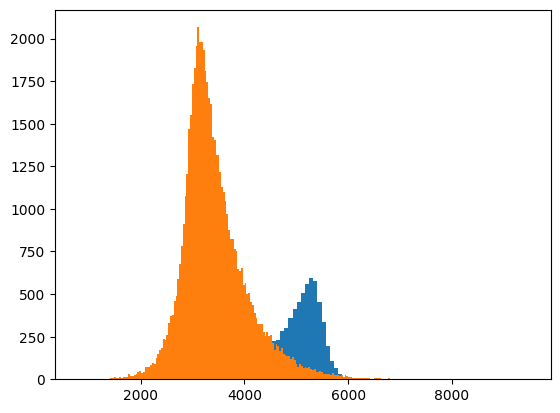

In [21]:
plt.hist(Mjj_signal, bins = 'auto')
plt.hist(Mjj_background, bins='auto')
print(np.shape((Mjj_signal)))
print(np.shape((Mjj_background)))

#plt.xlim(4000,6000)
plt.show()

Preprocessing the data (generate pixelated image, rotation, shifting, etc.)

In [9]:
#Grid settings
xpixels = np.arange(-1, 1, 2/75)
ypixels = np.arange(-1, 1, 2/75)

# function to return the image momenta for centroid and principal axis
def img_mom (x, y, weights, x_power, y_power):
    return ((x**x_power)*(y**y_power)*weights).sum()

# returns the jet image
def orig_image (etas, phis, es):
    """
    Gives the value on grid with minimal distance,
    eg. for xpixel = (0,1,2,3,..) eta=1.3 -> xpixel=1, eta=1.6 ->xpixel=2
    """
    z = np.zeros((len(xpixels),len(ypixels)))
    in_grid = ~((etas < xpixels[0]) | (etas > xpixels[-1]) | (phis < ypixels[0]) | (phis > ypixels[-1]))
    xcoords = np.argmin(np.abs(etas[None,:] - xpixels[None,:,None]), axis = 1)
    ycoords = np.argmin(np.abs(phis[None,:] - ypixels[None,:,None]), axis = 1)
    z[xcoords[0][in_grid],ycoords[0][in_grid]] = es[in_grid]
    return z

# preprocess the jet
def preprocessing(x ,y, weights, rotate=True, flip=True):
    """
    (x,y) are the coordinates and weights the corresponding values, shifts
    centroid to origin, rotates image, so that principal axis is vertical,
    flips image, so that most weights lay in plane.
    Method for calculating principal axis (similar to tensor of inertia):
    https://en.wikipedia.org/wiki/Image_moment
    here: y=phi, phi has modulo 2*np.pi but it's not been taken care of hear,
    so possible issues with calculating the centroid
    -> pre-shifting of events outside of this function solves the problem
    for iamge-data with Delta_phi < 2*np.pi
    """

    # Shift
    x_centroid = img_mom(x, y, weights, 1, 0) / weights.sum()
    y_centroid = img_mom(x, y, weights, 0, 1)/ weights.sum()
    x = x - x_centroid
    y = y - y_centroid
    if rotate:
        #Ccovariant matrix, eigenvectors corr. to principal axis
        u11 = img_mom(x, y, weights, 1, 1) / weights.sum()
        u20 = img_mom(x, y, weights, 2, 0) / weights.sum()
        u02 = img_mom(x, y, weights, 0, 2) / weights.sum()
        cov = np.array([[u20, u11], [u11, u02]])

        # Eigenvalues and eigenvectors of covariant matrix
        evals, evecs = np.linalg.eig(cov)

        # Sorts the eigenvalues, v1, [::-1] turns array around, 
        sort_indices = np.argsort(evals)[::-1]
        e_1 = evecs[:, sort_indices[0]]  # Eigenvector with largest eigenvalue
        e_2 = evecs[:, sort_indices[1]]
        
        # Theta to x_axis, arctan2 gives correct angle
        theta = np.arctan2(e_1[0], e_1[1])
  
        # Rotation, so that princple axis is vertical
        # anti-clockwise rotation matrix
        rotation = np.matrix([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
        transformed_mat = rotation * np.stack([x,y])
        x_rot, y_rot = transformed_mat.A
    else: 
        x_rot, y_rot = x, y
    
    n_flips = 0
  
    # Flipping
    if flip:
        if x_rot[np.argmax(weights)] < 0.:
            x_rot = -x_rot
            n_flips  += 1
        if y_rot[np.argmax(weights)] < 0.:
            y_rot = -y_rot
            n_flips += 1
            
    return x_rot, y_rot


# function to convert the jet to an image
def constit_to_img(phis, etas, pT, rotate, flip):
                    
    phis[phis < -np.pi] += 2*np.pi
    phis[phis > np.pi] -= 2*np.pi
                    
    weights = pT
    
    etas, phis = preprocessing(etas, phis, weights, rotate, flip)

    z_ori = orig_image(etas, phis, weights)
    
    return z_ori
        
    #print( "Cropping and normalising" )
    #n_crop = 40
    #z_new = np.zeros((z_ori.shape[0],n_crop, n_crop))
    #for i in range(z_ori.shape[0]):
        #Npix = z_ori[i,:,:].shape
        #z_new[i,:,:] = z_ori[i, int(Npix[0]/2-n_crop/2) : int(Npix[0]/2+n_crop/2), int(Npix[1]/2-n_crop/2) : int(Npix[1]/2+n_crop/2) ]
        #if norm:
            #z_sum = z_new[i,:,:].sum()
            #if z_sum != 0.:
                #z_new[i,:,:] = z_new[i,:,:]/z_sum
    
    #print( "Reshaping" )
    #z_out = z_new.reshape( (z_new.shape[0],-1) )
    


Plot one jet event

In [10]:
z = constit_to_img(np.array(final_signal_eta[0]), np.array(final_signal_phi[0]), np.array(final_signal_Pt[0]),
                  False, False)

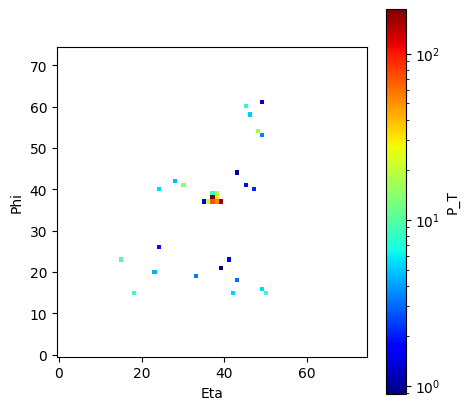

In [11]:
masked_data = np.ma.masked_equal(z, 0.)

# Create a colormap based on 'jet'
jet = plt.cm.jet

# Create a custom colormap with white for masked values
colors = jet(np.linspace(0, 1, 256))
custom_cmap = mcolors.ListedColormap(colors)
# Use a logarithmic norm, avoiding zero values
norm = mcolors.LogNorm(vmin=masked_data.min(), vmax=masked_data.max())

# Plot using imshow with the custom colormap and logarithmic normalization
plt.figure(figsize = (5,5))
plt.imshow(masked_data, cmap=custom_cmap, norm=norm, interpolation='nearest')
cbar = plt.colorbar()
cbar.set_label("P_T")
plt.xlabel("Eta")
plt.ylabel("Phi")
plt.gca().invert_yaxis()
plt.show()

After preprocessing

In [25]:
z = constit_to_img(np.array(final_signal_eta[0]), np.array(final_signal_phi[0]), np.array(final_signal_Pt[0]),
                  True, True)

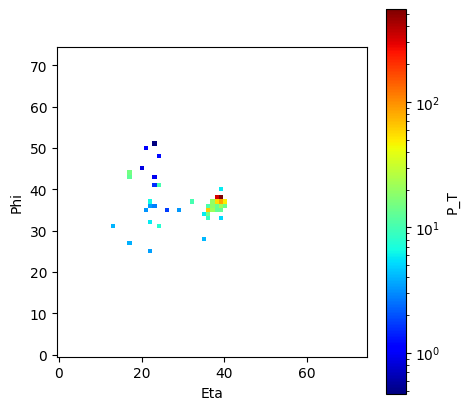

In [26]:

masked_data = np.ma.masked_equal(z, 0.)

# Create a colormap based on 'jet'
jet = plt.cm.jet

# Create a custom colormap with white for masked values
colors = jet(np.linspace(0, 1, 256))
custom_cmap = mcolors.ListedColormap(colors)
# Use a logarithmic norm, avoiding zero values
norm = mcolors.LogNorm(vmin=masked_data.min(), vmax=masked_data.max())

# Plot using imshow with the custom colormap and logarithmic normalization
plt.figure(figsize = (5,5))
plt.imshow(masked_data, cmap=custom_cmap, norm=norm, interpolation='nearest')
cbar = plt.colorbar()
cbar.set_label("P_T")
plt.xlabel("Eta")
plt.ylabel("Phi")
plt.gca().invert_yaxis()
plt.show()

Working for all images

In [27]:
all_images_signal_sr = []
all_images_signal_sb = []
for idx, xd in enumerate(final_signal_eta):
    etas = np.array(final_signal_eta[idx])
    phis = np.array(final_signal_phi[idx])
    Pts = np.array(final_signal_Pt[idx])
    if 4700 <= Mjj_signal[idx] <= 5500:
        all_images_signal_sr.append(constit_to_img(etas, phis, Pts, True, True))
    elif  4400 <= Mjj_signal[idx] <= 4700 or 5500 <= Mjj_signal[idx] <= 5800:
        all_images_signal_sb.append(constit_to_img(etas, phis, Pts, True, True))
all_images_signal_sr = np.array(all_images_signal_sr)
all_images_signal_sb = np.array(all_images_signal_sb)

In [29]:
print(np.shape(all_images_signal_sr))

(4522, 75, 75)


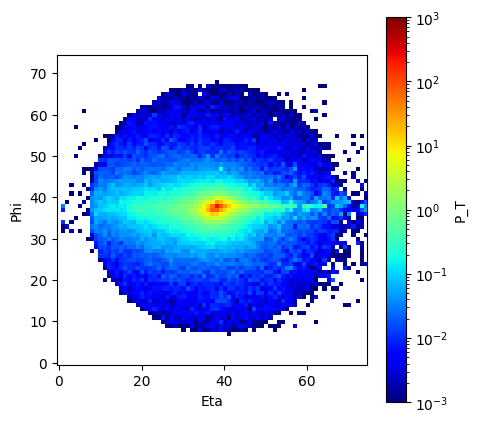

In [28]:
masked_data = np.ma.masked_equal(np.mean(all_images_signal_sr, axis = 0), 0.)

# Create a colormap based on 'jet'
jet = plt.cm.jet

# Create a custom colormap with white for masked values
colors = jet(np.linspace(0, 1, 256))
custom_cmap = mcolors.ListedColormap(colors)
# Use a logarithmic norm, avoiding zero values
norm = mcolors.LogNorm(vmin=10**-3, vmax=10**3)

# Plot using imshow with the custom colormap and logarithmic normalization
plt.figure(figsize = (5,5))
plt.imshow(masked_data, cmap=custom_cmap, norm=norm, interpolation='nearest')
cbar = plt.colorbar()
cbar.set_label("P_T")
plt.xlabel("Eta")
plt.ylabel("Phi")
plt.gca().invert_yaxis()
plt.show()

In [1298]:
all_images_background_sr = []
all_images_background_sb = []
for idx, xd in enumerate(final_background_eta):
    etas = np.array(final_background_eta[idx])
    phis = np.array(final_background_phi[idx])
    Pts = np.array(final_background_Pt[idx])
    if 4700 <= Mjj_background[idx] <= 5500:
        all_images_background_sr.append(constit_to_img(etas, phis, Pts, True, True))
    elif  4400 <= Mjj_background[idx] <= 4700 or 5500 <= Mjj_background[idx] <= 5800:
        all_images_background_sb.append(constit_to_img(etas, phis, Pts, True, True))
all_images_background_sr = np.array(all_images_background_sr)
all_images_background_sb = np.array(all_images_background_sb)

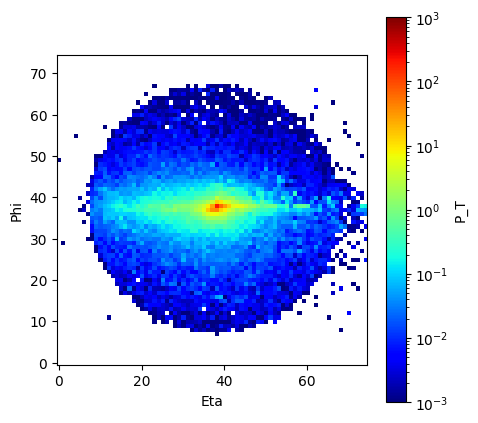

In [1299]:
masked_data = np.ma.masked_equal(np.mean(all_images_background_sr, axis = 0), 0.)

# Create a colormap based on 'jet'
jet = plt.cm.jet

# Create a custom colormap with white for masked values
colors = jet(np.linspace(0, 1, 256))
custom_cmap = mcolors.ListedColormap(colors)
# Use a logarithmic norm, avoiding zero values
norm = mcolors.LogNorm(vmin=10**-3, vmax=10**3)

# Plot using imshow with the custom colormap and logarithmic normalization
plt.figure(figsize = (5,5))
plt.imshow(masked_data, cmap=custom_cmap, norm=norm, interpolation='nearest')
cbar = plt.colorbar()
cbar.set_label("P_T")
plt.xlabel("Eta")
plt.ylabel("Phi")
plt.gca().invert_yaxis()
plt.show()

Test one sample

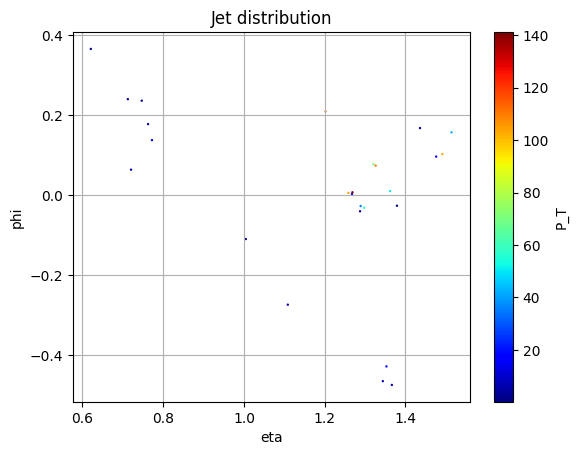

In [1357]:
scatter = plt.scatter(final_signal_eta[-1], final_signal_phi[-1], c= final_signal_Pt[-1], s = 0.5, cmap='jet')
colorbar = plt.colorbar(scatter)
colorbar.set_label('P_T')
# Add labels and title
plt.xlabel('eta')
plt.ylabel('phi')
plt.title('Jet distribution')

# Show plot
plt.grid(True)
plt.show()

Saving files

In [1358]:
os.chdir(r'/home/manhducnmd/pp_dijet')

In [1359]:
with open('dd50_sr_jet_2_75.npy', 'wb') as f:
    np.save(f, all_images_signal_sr)
with open('dd50_sb_jet_2_75.npy', 'wb') as f:
    np.save(f, all_images_signal_sb)

Code for extracting background events

In [6]:
Pt_background = []

P4_1_background = []
P4_2_background = []

Mjj_background = []

eta_1_background = []
eta_2_background = []

phi_1_background = []
phi_2_background = []

final_background_eta = []
final_background_phi = []
final_background_Pt = []

for k in range(0,30):
    if k < 3:
        inputFile= f'/home/manhducnmd/pp_dijet/Events/run_06_{k}/tag_2_delphes_events.root'
    else:
        inputFile= f'/home/manhducnmd/pp_dijet/Events/run_06_{k}/tag_1_delphes_events.root'
    chain = ROOT.TChain("Delphes")
    chain.Add(inputFile)

    # Create object of class ExRootTreeReader
    treeReader = ROOT.ExRootTreeReader(chain)
    numberOfEntries = treeReader.GetEntries()
    print(numberOfEntries)
    # Get pointers to branches used in this analysis
    branchJet = treeReader.UseBranch("Jet")
    branchEFlowTrack = treeReader.UseBranch("EFlowTrack")
    branchEFlowPhoton = treeReader.UseBranch("EFlowPhoton")
    branchEFlowNeutralHadron = treeReader.UseBranch("EFlowNeutralHadron")
    

    for i in range(0, numberOfEntries): 
        treeReader.ReadEntry(i)

        if branchJet.GetEntries() > 2:
            jet1 = branchJet.At(0)      # The first leading jet
            jet2 = branchJet.At(1)   # The second leading jet
            jetvec1= jet1.P4() 
            jetvec2= jet2.P4() 
            jet_total = jetvec1 + jetvec2
            if jetvec1.Pt() > 700 and jetvec2.Pt() > 700:
                if np.abs(jetvec1.Eta()) <= 2 or np.abs(jetvec1.Eta()) <=2:
                    Pt_background.append(jetvec1.Pt()) 
                
                    P4_1_background.append(jetvec1)
                    P4_2_background.append(jetvec2)
                
                    Mjj_background.append(jet_total.M())
                
                    eta_1_background.append(jetvec1.Eta())
                    eta_2_background.append(jetvec2.Eta())
                
                    phi_1_background.append(jetvec1.Phi())
                    phi_2_background.append(jetvec2.Phi())
                
                    constituent_background_eta = []
                    constituent_background_phi = []
                    constituent_background_Pt = []
                    #for constituent in jet1.Constituents: 
                        #constituent_background_eta.append(constituent.P4().Eta())
                        #constituent_background_phi.append(constituent.P4().Phi())
                        #constituent_background_Pt.append(constituent.P4().Pt())
                    for constituent_2 in jet2.Constituents:
                        constituent_background_eta.append(constituent_2.P4().Eta())
                        constituent_background_phi.append(constituent_2.P4().Phi())
                        constituent_background_Pt.append(constituent_2.P4().Pt())
                    final_background_eta.append(constituent_background_eta)
                    final_background_phi.append(constituent_background_phi)
                    final_background_Pt.append(constituent_background_Pt)
    
    chain.Reset()
Pt_background = np.array(Pt_background)

P4_1_background = np.array(P4_1_background)
P4_2_background = np.array(P4_2_background)

Mjj_background = np.array(Mjj_background)

eta_1_background = np.array(eta_1_background)
eta_2_background = np.array(eta_2_background)

phi_1_background = np.array(phi_1_background)
phi_2_background = np.array(phi_2_background)

100000
100000
100000
100000
100000
100000
100000
100000
100000
100000
100000
100000
100000
100000
100000
100000
100000
100000
100000
100000
100000
100000
100000
100000
100000
100000
100000
100000
100000
100000


Warning in <TStreamerInfo::BuildCheck>: 
   The StreamerInfo for version 3 of class Track read from the file /home/manhducnmd/pp_dijet/Events/run_06_0/tag_2_delphes_events.root
   has a different checksum than the previously loaded StreamerInfo.
   Reading objects of type Track from the file /home/manhducnmd/pp_dijet/Events/run_06_0/tag_2_delphes_events.root 
   (and potentially other files) might not work correctly.
   Most likely the version number of the class was not properly
   updated [See ClassDef(Track,3)].
Warning in <TStreamerInfo::CompareContent>: The following data member of
the on-file layout version 3 of class 'Track' differs from 
the in-memory layout version 3:
   float EtaOuter; //
vs
   float C; //
Warning in <TStreamerInfo::CompareContent>: The following data member of
the on-file layout version 3 of class 'Track' differs from 
the in-memory layout version 3:
   float PhiOuter; //
vs
   float Mass; //
Warning in <TStreamerInfo::CompareContent>: The following data mem

In [7]:
#Grid settings
xpixels = np.arange(-1, 1, 2/50)
ypixels = np.arange(-1, 1, 2/50)

# function to return the image momenta for centroid and principal axis
def img_mom (x, y, weights, x_power, y_power):
    return ((x**x_power)*(y**y_power)*weights).sum()

# returns the jet image
def orig_image (etas, phis, es):
    """
    Gives the value on grid with minimal distance,
    eg. for xpixel = (0,1,2,3,..) eta=1.3 -> xpixel=1, eta=1.6 ->xpixel=2
    """
    z = np.zeros((len(xpixels),len(ypixels)))
    in_grid = ~((etas < xpixels[0]) | (etas > xpixels[-1]) | (phis < ypixels[0]) | (phis > ypixels[-1]))
    xcoords = np.argmin(np.abs(etas[None,:] - xpixels[None,:,None]), axis = 1)
    ycoords = np.argmin(np.abs(phis[None,:] - ypixels[None,:,None]), axis = 1)
    z[xcoords[0][in_grid],ycoords[0][in_grid]] = es[in_grid]
    return z

# preprocess the jet
def preprocessing(x ,y, weights, rotate=True, flip=True):
    """
    (x,y) are the coordinates and weights the corresponding values, shifts
    centroid to origin, rotates image, so that principal axis is vertical,
    flips image, so that most weights lay in plane.
    Method for calculating principal axis (similar to tensor of inertia):
    https://en.wikipedia.org/wiki/Image_moment
    here: y=phi, phi has modulo 2*np.pi but it's not been taken care of hear,
    so possible issues with calculating the centroid
    -> pre-shifting of events outside of this function solves the problem
    for iamge-data with Delta_phi < 2*np.pi
    """

    # Shift
    x_centroid = img_mom(x, y, weights, 1, 0) / weights.sum()
    y_centroid = img_mom(x, y, weights, 0, 1)/ weights.sum()
    x = x - x_centroid
    y = y - y_centroid
    if rotate:
        #Ccovariant matrix, eigenvectors corr. to principal axis
        u11 = img_mom(x, y, weights, 1, 1) / weights.sum()
        u20 = img_mom(x, y, weights, 2, 0) / weights.sum()
        u02 = img_mom(x, y, weights, 0, 2) / weights.sum()
        cov = np.array([[u20, u11], [u11, u02]])

        # Eigenvalues and eigenvectors of covariant matrix
        evals, evecs = np.linalg.eig(cov)

        # Sorts the eigenvalues, v1, [::-1] turns array around, 
        sort_indices = np.argsort(evals)[::-1]
        e_1 = evecs[:, sort_indices[0]]  # Eigenvector with largest eigenvalue
        e_2 = evecs[:, sort_indices[1]]
        
        # Theta to x_axis, arctan2 gives correct angle
        theta = np.arctan2(e_1[0], e_1[1])
  
        # Rotation, so that princple axis is vertical
        # anti-clockwise rotation matrix
        rotation = np.matrix([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
        transformed_mat = rotation * np.stack([x,y])
        x_rot, y_rot = transformed_mat.A
    else: 
        x_rot, y_rot = x, y
    
    n_flips = 0
  
    # Flipping
    if flip:
        if x_rot[np.argmax(weights)] < 0.:
            x_rot = -x_rot
            n_flips  += 1
        if y_rot[np.argmax(weights)] < 0.:
            y_rot = -y_rot
            n_flips += 1
            
    return x_rot, y_rot


# function to convert the jet to an image
def constit_to_img(phis, etas, pT, rotate, flip):
                    
    phis[phis < -np.pi] += 2*np.pi
    phis[phis > np.pi] -= 2*np.pi
                    
    weights = pT
    
    etas, phis = preprocessing(etas, phis, weights, rotate, flip)

    z_ori = orig_image(etas, phis, weights)
    
    return z_ori
        
    #print( "Cropping and normalising" )
    #n_crop = 40
    #z_new = np.zeros((z_ori.shape[0],n_crop, n_crop))
    #for i in range(z_ori.shape[0]):
        #Npix = z_ori[i,:,:].shape
        #z_new[i,:,:] = z_ori[i, int(Npix[0]/2-n_crop/2) : int(Npix[0]/2+n_crop/2), int(Npix[1]/2-n_crop/2) : int(Npix[1]/2+n_crop/2) ]
        #if norm:
            #z_sum = z_new[i,:,:].sum()
            #if z_sum != 0.:
                #z_new[i,:,:] = z_new[i,:,:]/z_sum
    
    #print( "Reshaping" )
    #z_out = z_new.reshape( (z_new.shape[0],-1) )
    


In [8]:
all_images_background_sr = []
all_images_background_sb = []
for idx, xd in enumerate(final_background_eta):
    etas = np.array(final_background_eta[idx])
    phis = np.array(final_background_phi[idx])
    Pts = np.array(final_background_Pt[idx])
    if 4700 <= Mjj_background[idx] <= 5500:
        all_images_background_sr.append(constit_to_img(etas, phis, Pts, True, True))
    elif  4400 <= Mjj_background[idx] <= 4700 or 5500 <= Mjj_background[idx] <= 5800:
        all_images_background_sb.append(constit_to_img(etas, phis, Pts, True, True))
all_images_background_sr = np.array(all_images_background_sr)
all_images_background_sb = np.array(all_images_background_sb)

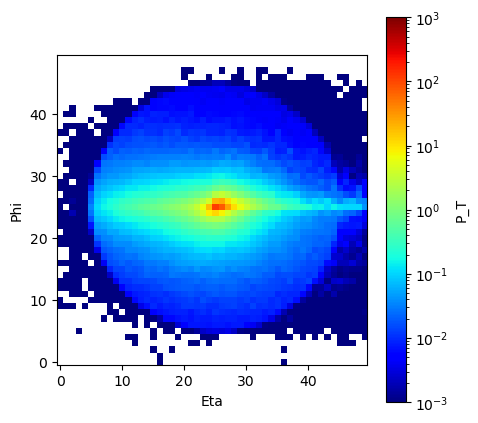

In [9]:
masked_data = np.ma.masked_equal(np.mean(all_images_background_sr, axis = 0), 0.)

# Create a colormap based on 'jet'
jet = plt.cm.jet

# Create a custom colormap with white for masked values
colors = jet(np.linspace(0, 1, 256))
custom_cmap = mcolors.ListedColormap(colors)
# Use a logarithmic norm, avoiding zero values
norm = mcolors.LogNorm(vmin=10**-3, vmax=10**3)

# Plot using imshow with the custom colormap and logarithmic normalization
plt.figure(figsize = (5,5))
plt.imshow(masked_data, cmap=custom_cmap, norm=norm, interpolation='nearest')
cbar = plt.colorbar()
cbar.set_label("P_T")
plt.xlabel("Eta")
plt.ylabel("Phi")
plt.gca().invert_yaxis()
plt.show()

In [10]:
print(len(all_images_background_sr), len(all_images_background_sb))

62171 64376


In [11]:
os.chdir(r'/home/manhducnmd/pp_dijet/Results_full')
with open('background_images_sr_50_jet_2.npy','wb') as f:
    np.save(f, all_images_background_sr)
with open('background_images_sb_50_jet_2.npy', 'wb') as g:
    np.save(g, all_images_background_sb)
    

For signal files

In [8]:
files = ['id1.root', 
         'id5.root', 
         'id10.root',
         'id20.root',
         'id30.root',
         'id40.root',
         'id50.root',
         'dd1.root',
         'dd5.root',
         'dd10.root',
         'dd20.root',
         'dd30.root',
         'dd40.root',
         'dd50.root']

id1.root


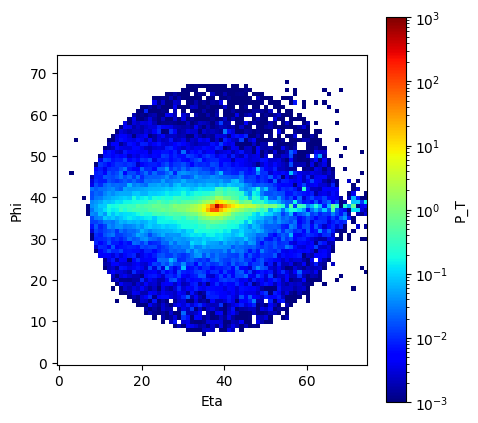

id5.root


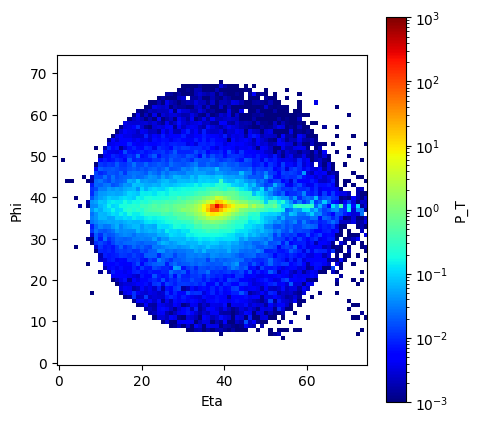

id10.root


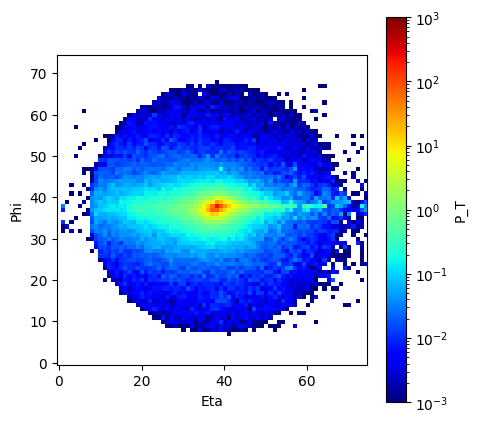

id20.root


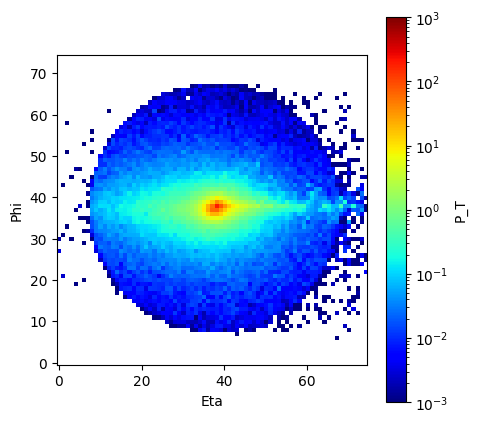

id30.root


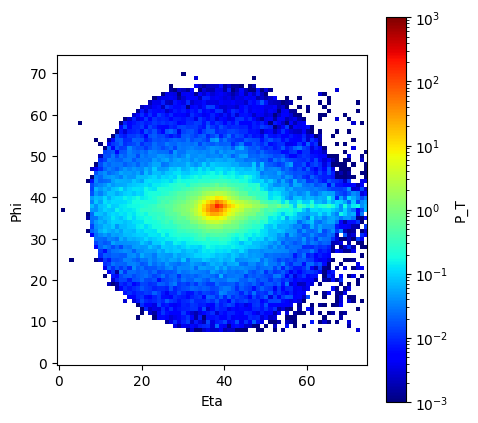

id40.root


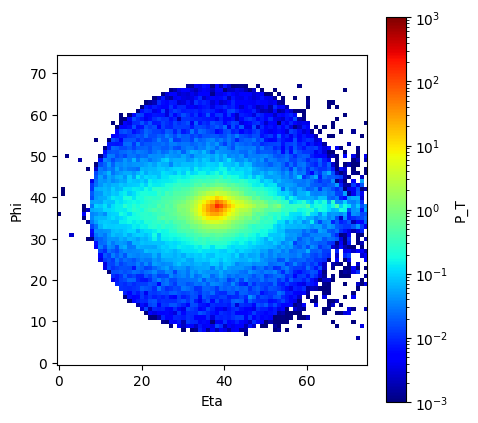

id50.root


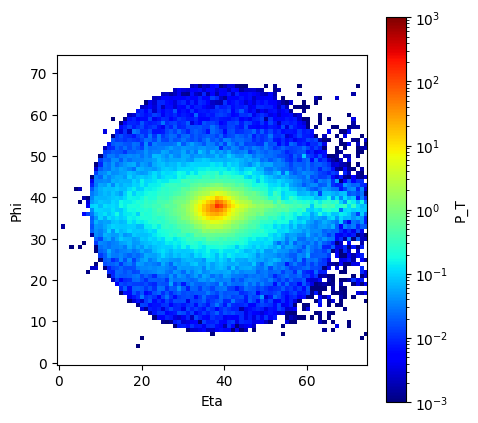

dd1.root


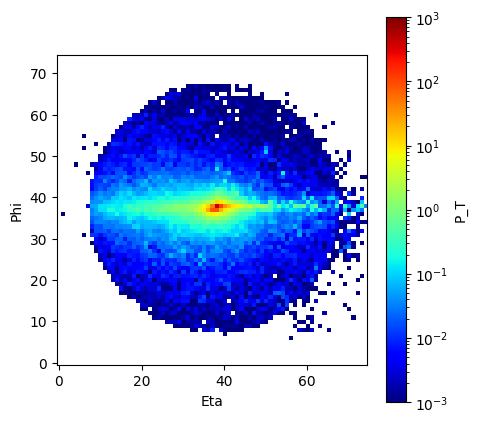

dd5.root


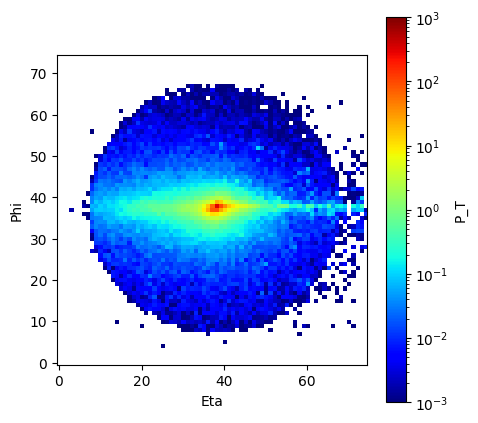

dd10.root


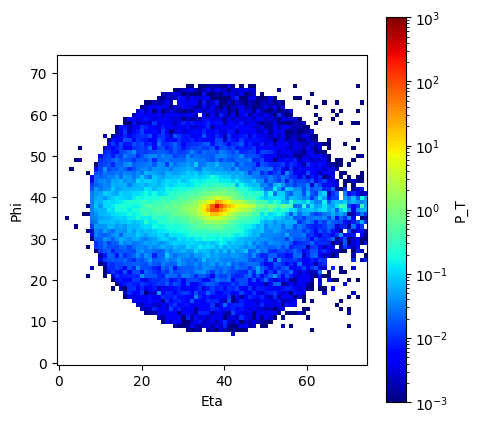

dd20.root


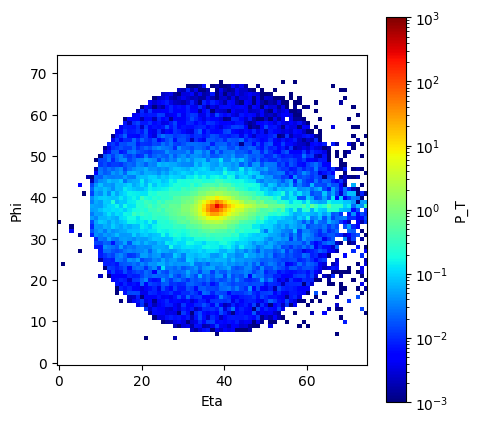

dd30.root


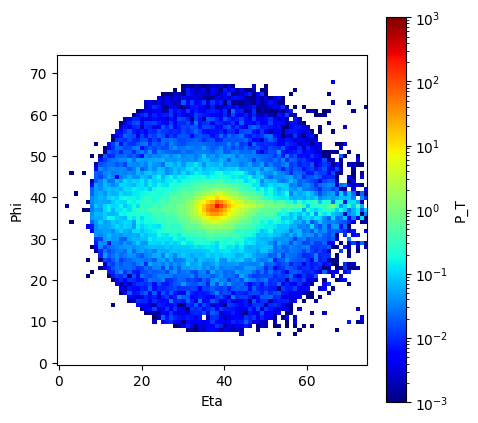

dd40.root


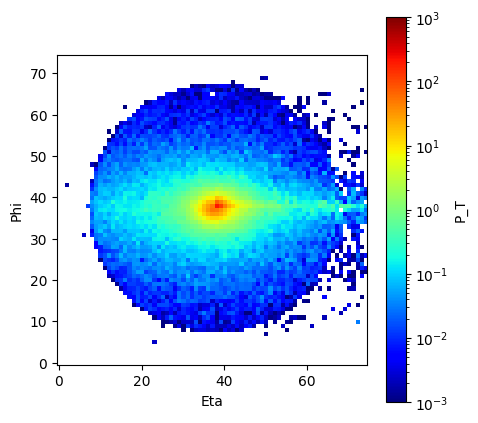

dd50.root


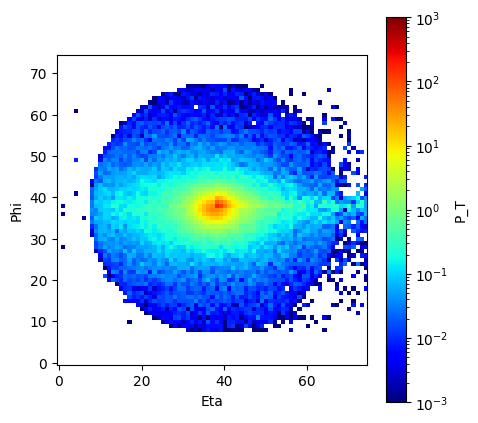

In [9]:
for file in files:
    inputFile = '/home/manhducnmd/pythia8312/events/' + file
    chain = ROOT.TChain("Delphes")
    chain.Add(inputFile)

    # Create object of class ExRootTreeReader
    treeReader = ROOT.ExRootTreeReader(chain)
    numberOfEntries = treeReader.GetEntries()

    # Get pointers to branches used in this analysis
    branchJet = treeReader.UseBranch("Jet")
    branchEFlowTrack = treeReader.UseBranch("EFlowTrack")
    branchEFlowPhoton = treeReader.UseBranch("EFlowPhoton")
    branchEFlowNeutralHadron = treeReader.UseBranch("EFlowNeutralHadron")
    print(file)
    Pt_signal = []

    P4_1_signal = []
    P4_2_signal = []

    Mjj_signal = []

    eta_1_signal = []
    eta_2_signal = []

    phi_1_signal = []
    phi_2_signal = []

    final_signal_eta = []
    final_signal_phi = []
    final_signal_Pt = []
    
    for entry_no in range(0, numberOfEntries): 
        treeReader.ReadEntry(entry_no)
    
        if branchJet.GetEntries() > 2:
            jet1 = branchJet.At(0)      # The first leading jet
            jet2 = branchJet.At(1)   # The second leading jet
            jetvec1= jet1.P4() 
            jetvec2= jet2.P4() 
            jet_total = jetvec1 + jetvec2
            if jetvec1.Pt() > 700 and jetvec2.Pt() > 700:
                if np.abs(jetvec1.Eta()) <= 2 or np.abs(jetvec1.Eta()) <=2:
                
                    Pt_signal.append(jetvec1.Pt()) 
                
                    P4_1_signal.append(jetvec1)
                    P4_2_signal.append(jetvec2)
                
                    Mjj_signal.append(jet_total.M())
                
                    eta_1_signal.append(jetvec1.Eta())
                    eta_2_signal.append(jetvec2.Eta())
                
                    phi_1_signal.append(jetvec1.Phi())
                    phi_2_signal.append(jetvec2.Phi()) 
                
                    constituent_signal_eta = []
                    constituent_signal_phi = []
                    constituent_signal_Pt = []
                    for constituent in jet1.Constituents: 
                        constituent_signal_eta.append(constituent.P4().Eta())
                        constituent_signal_phi.append(constituent.P4().Phi())
                        constituent_signal_Pt.append(constituent.P4().Pt())
                    #for constituent_2 in jet2.Constituents:
                        #constituent_signal_eta.append(constituent_2.P4().Eta())
                        #constituent_signal_phi.append(constituent_2.P4().Phi())
                        #constituent_signal_Pt.append(constituent_2.P4().Pt())
                
                    final_signal_eta.append(constituent_signal_eta)
                    final_signal_phi.append(constituent_signal_phi)
                    final_signal_Pt.append(constituent_signal_Pt)
     
    Pt_signal = np.array(Pt_signal)

    P4_1_signal = np.array(P4_1_signal)
    P4_2_signal = np.array(P4_2_signal)

    Mjj_signal = np.array(Mjj_signal)

    eta_1_signal = np.array(eta_1_signal)
    eta_2_signal = np.array(eta_2_signal)

    phi_1_signal = np.array(phi_1_signal)
    phi_2_signal = np.array(phi_2_signal)
    
    all_images_signal_sr = []
    all_images_signal_sb = []
    for idx, xd in enumerate(final_signal_eta):
        etas = np.array(final_signal_eta[idx])
        phis = np.array(final_signal_phi[idx])
        Pts = np.array(final_signal_Pt[idx])
        if 4700 <= Mjj_signal[idx] <= 5500:
            all_images_signal_sr.append(constit_to_img(etas, phis, Pts, True, True))
        elif  4400 <= Mjj_signal[idx] <= 4700 or 5500 <= Mjj_signal[idx] <= 5800:
            all_images_signal_sb.append(constit_to_img(etas, phis, Pts, True, True))
    all_images_signal_sr = np.array(all_images_signal_sr)
    all_images_signal_sb = np.array(all_images_signal_sb)
    
    masked_data = np.ma.masked_equal(np.mean(all_images_signal_sr, axis = 0), 0.)

    # Create a colormap based on 'jet'
    jet_plot = plt.cm.jet

    # Create a custom colormap with white for masked values
    colors = jet_plot(np.linspace(0, 1, 256))
    custom_cmap = mcolors.ListedColormap(colors)
    # Use a logarithmic norm, avoiding zero values
    norm = mcolors.LogNorm(vmin=10**-3, vmax=10**3)

    # Plot using imshow with the custom colormap and logarithmic normalization
    plt.figure(figsize = (5,5))
    plt.imshow(masked_data, cmap=custom_cmap, norm=norm, interpolation='nearest')
    cbar = plt.colorbar()
    cbar.set_label("P_T")
    plt.xlabel("Eta")
    plt.ylabel("Phi")
    plt.gca().invert_yaxis()
    plt.show()
    
    chain.Reset()